# Import libraries

In [639]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline

# load data and exploring

In [307]:
city = pd.read_csv('E:/uni\AI quera\project\data_project1\iran_city_classification.csv')

In [308]:
city.head()

,نام شهر,دسته‌بندی
0,karaj,کلان‌شهر
1,tehran,کلان‌شهر
2,mashhad,کلان‌شهر
3,ahvaz,کلان‌شهر
4,kermanshah,کلان‌شهر


In [309]:
city = city.rename(columns={'نام شهر': 'city_slug', 'دسته‌بندی': 'category'})

In [310]:
df = pd.read_csv('E:/uni\AI quera\project\data_project1\Divar.csv', low_memory=False)

In [311]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
df = df.merge(city, on='city_slug')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963277 entries, 0 to 963276
Data columns (total 62 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  963277 non-null  int64  
 1   cat2_slug                   963277 non-null  object 
 2   cat3_slug                   963276 non-null  object 
 3   city_slug                   963277 non-null  object 
 4   neighborhood_slug           437139 non-null  object 
 5   created_at_month            963277 non-null  object 
 6   user_type                   284640 non-null  object 
 7   description                 963277 non-null  object 
 8   title                       963223 non-null  object 
 9   rent_mode                   344492 non-null  object 
 10  rent_value                  342867 non-null  float64
 11  rent_to_single              17 non-null      object 
 12  rent_type                   103192 non-null  object 
 13  price_mode    

## handling missing values

In [314]:
perc = df.isna().sum()*100/len(df)

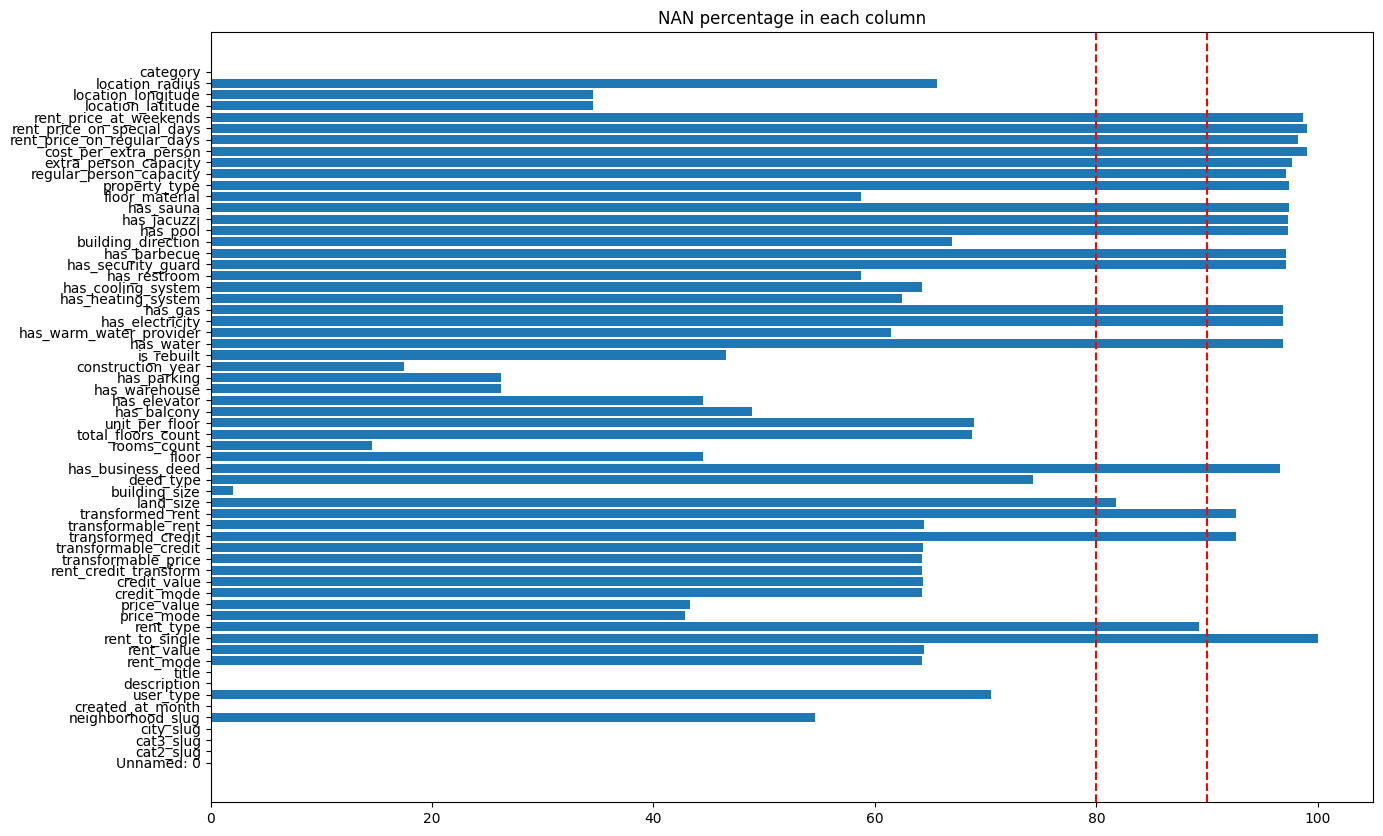

In [315]:
perc = df.isna().sum()*100/len(df)

gs = GridSpec(1, 1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(gs[0, 0])
ax.barh(df.columns, perc.values)
plt.axvline(x = 80, color = 'r', ls='--')
plt.axvline(x = 90, color = 'r', ls='--')
plt.title('NAN percentage in each column')
plt.show()

<Axes: >

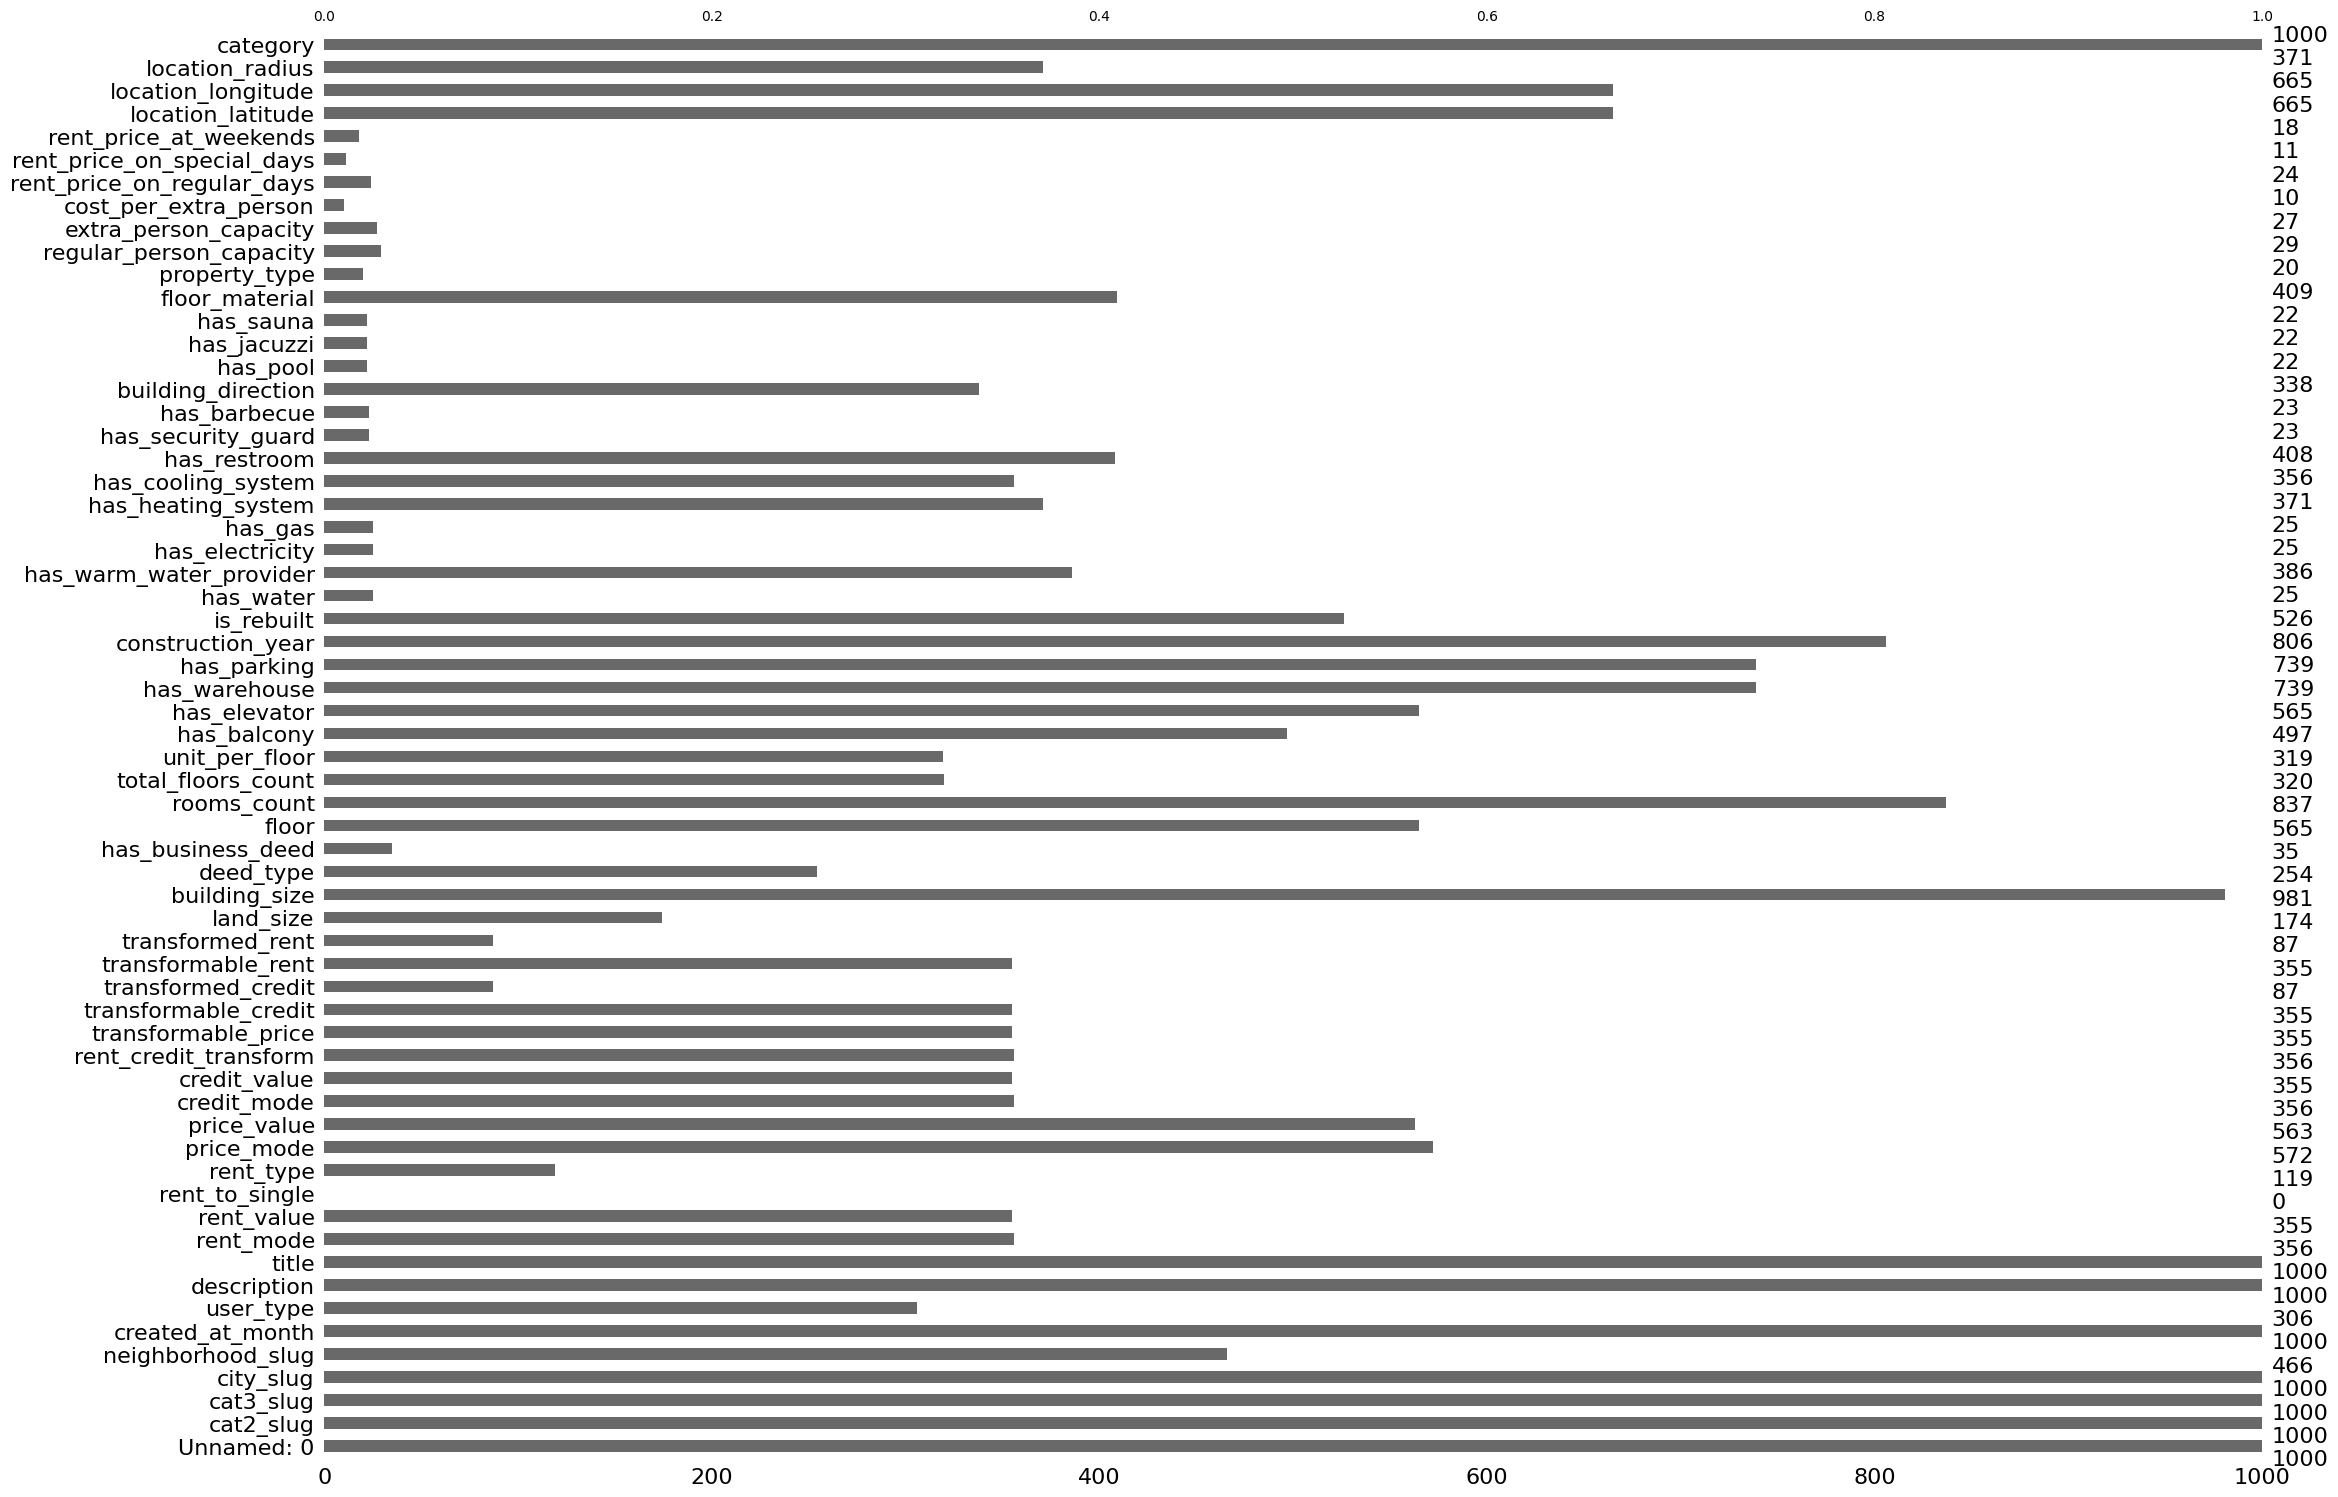

In [316]:
msno.bar(df.sample(1000))

<Axes: >

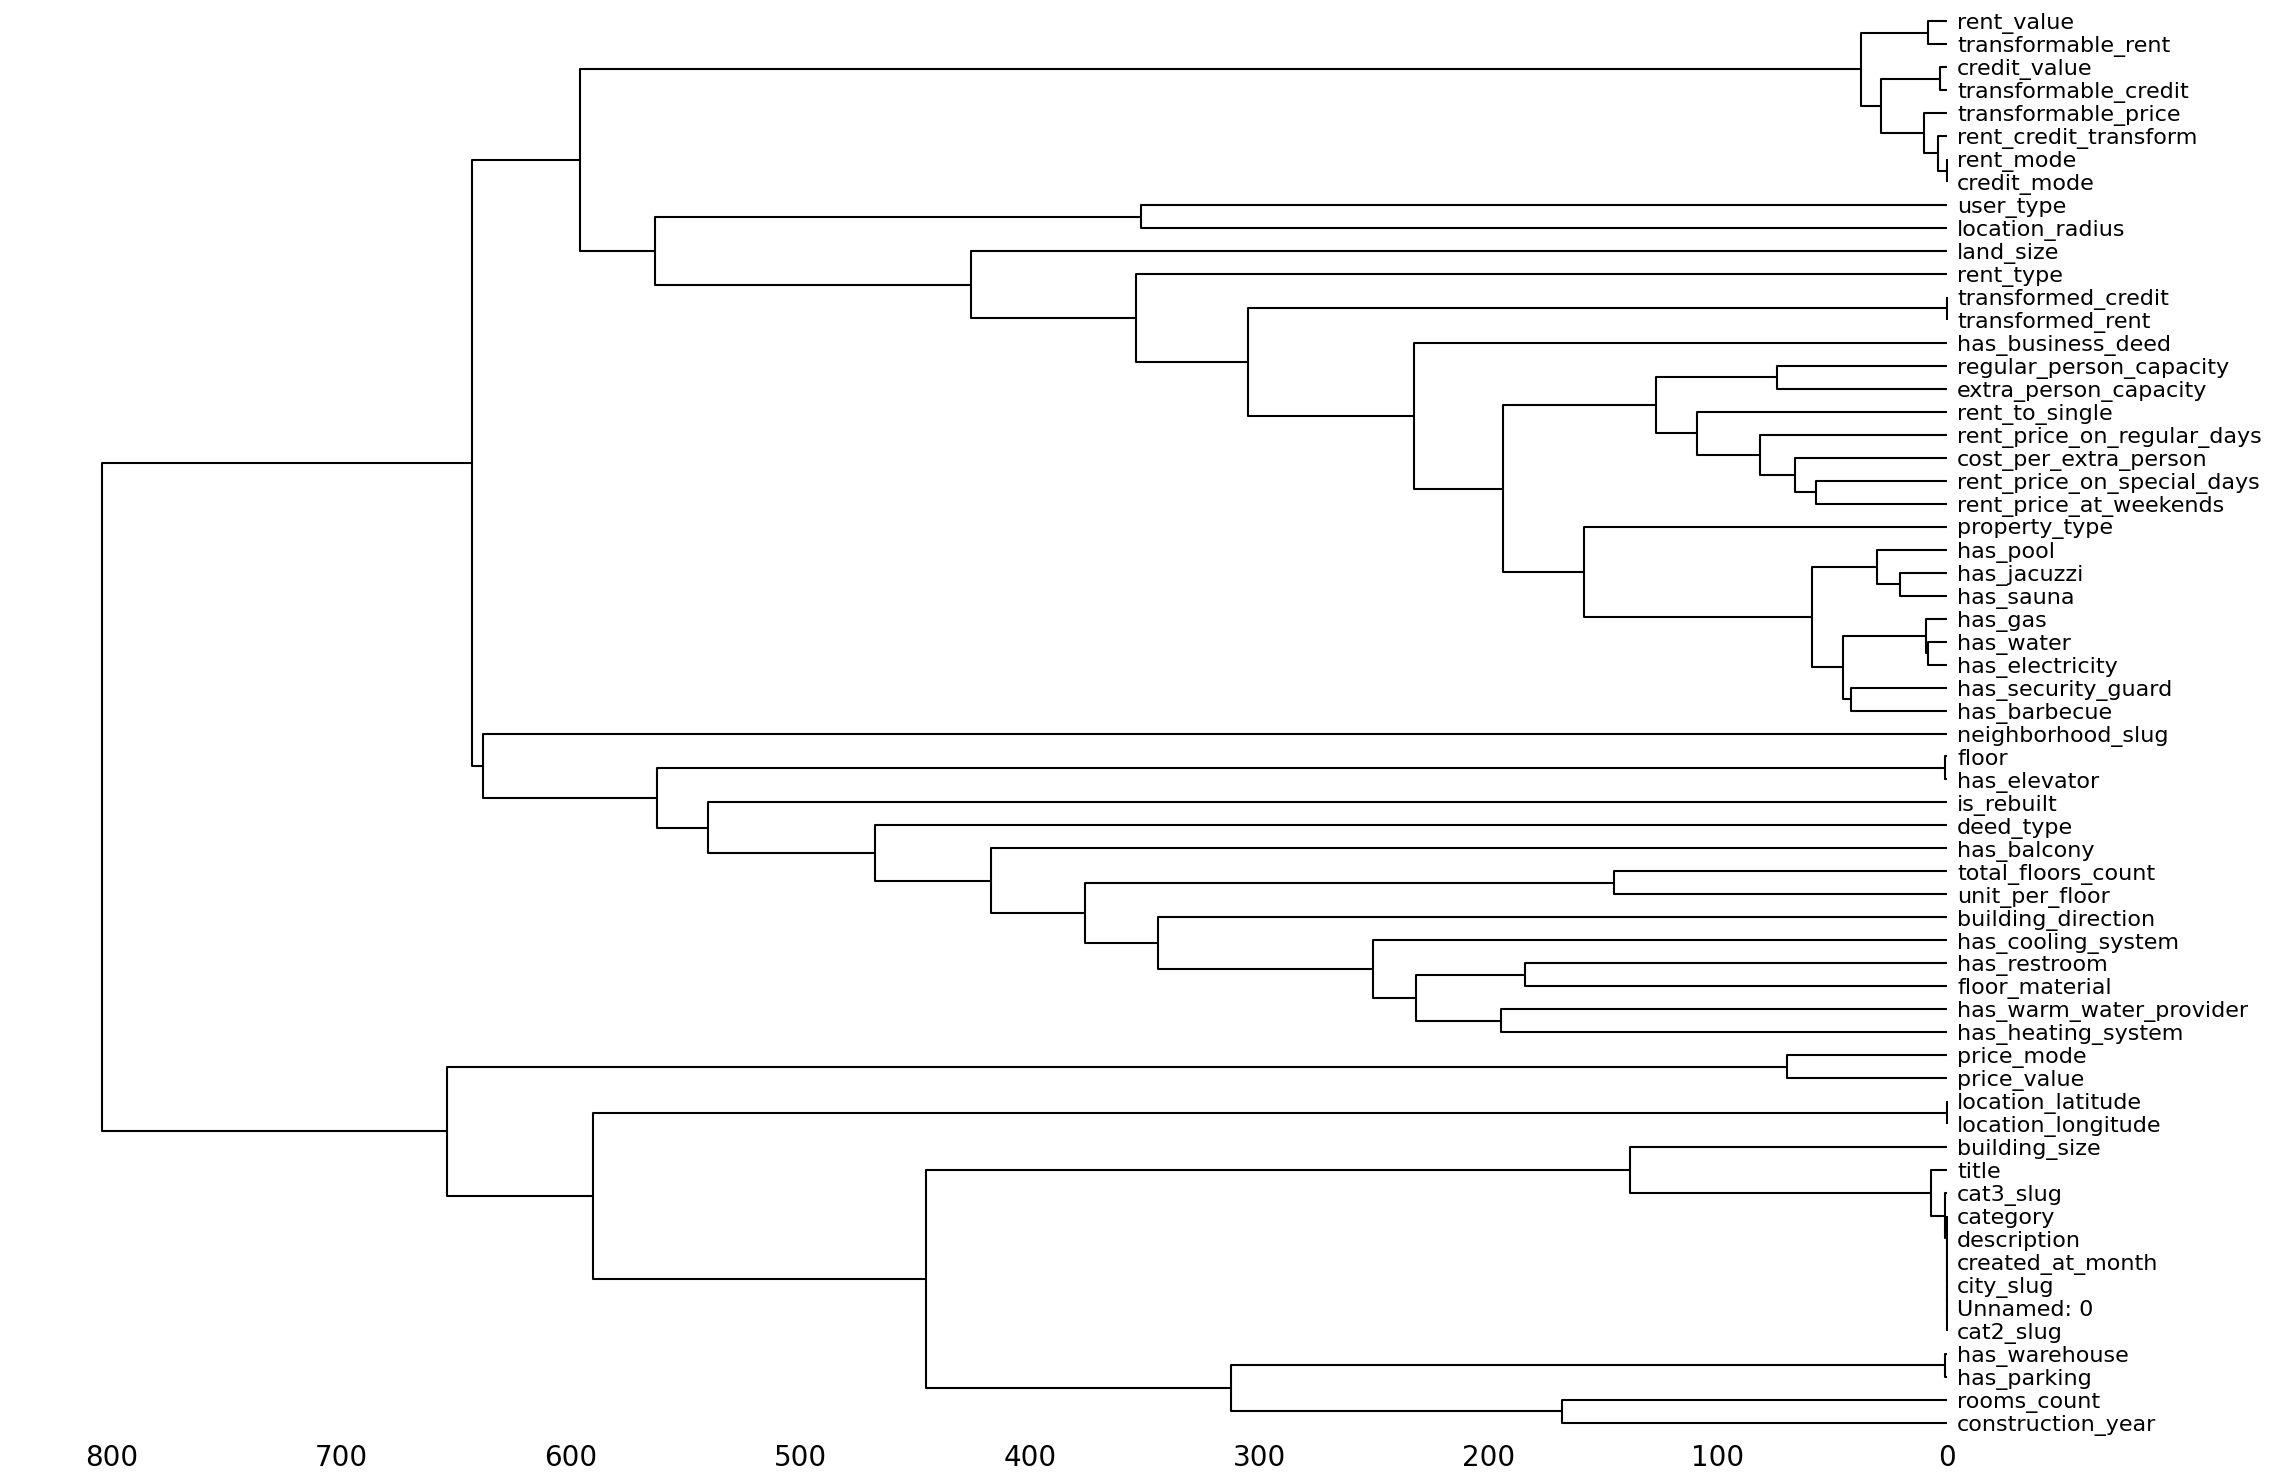

In [317]:
msno.dendrogram(df)

Some of features are unnecessary(have a lot of nan or has no info for predict price). So we can drop them!

In [318]:
df.columns

Index(['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug',
       'neighborhood_slug', 'created_at_month', 'user_type', 'description',
       'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',
       'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony',
       'has_elevator', 'has_warehouse', 'has_parking', 'construction_year',
       'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
       'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'regular_person_capacity',

In [319]:
df[['title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',]].head()

,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
0,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
4,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


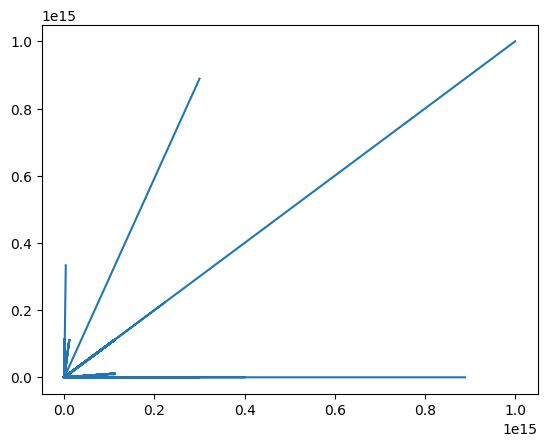

In [320]:
plt.plot(df['transformable_credit'], df['transformable_rent'])

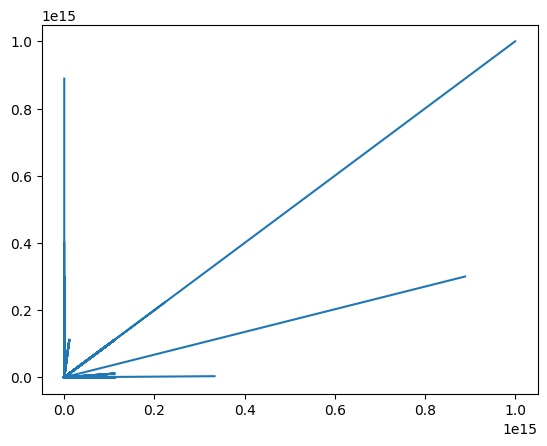

In [321]:
plt.plot(df['rent_value'], df['credit_value'])

In [322]:
df.cat2_slug.value_counts()

cat2_slug
residential-sell        535023
residential-rent        270052
commercial-rent          74566
commercial-sell          36906
temporary-rent           27752
real-estate-services     18978
Name: count, dtype: int64

In [323]:
df.cat3_slug.value_counts()

cat3_slug
apartment-sell                        299928
apartment-rent                        208957
plot-old                              120619
house-villa-sell                      114476
house-villa-rent                       61095
shop-rent                              44563
office-rent                            21277
shop-sell                              20920
presell                                15443
suite-apartment                        15407
villa                                  11821
industry-agriculture-business-sell     10874
industry-agriculture-business-rent      8725
office-sell                             5112
partnership                             3535
workspace                                524
Name: count, dtype: int64

In [324]:
df.property_type.value_counts()

property_type
jungle             15638
beach               3555
other               3307
jungle-mountain     2063
mountain             146
Name: count, dtype: int64

In [325]:
df1 = df.drop(['Unnamed: 0', 'cat2_slug', 'rent_to_single', 'rent_price_on_regular_days',
              'rent_price_on_special_days', 'rent_price_at_weekends', 'cost_per_extra_person',
              'extra_person_capacity', 'regular_person_capacity', 'title', 'description',
              'has_pool', 'has_jacuzzi', 'has_sauna', 'has_security_guard', 'has_barbecue',
              'has_water', 'has_electricity', 'has_gas', 'transformed_credit', 'transformable_rent','transformed_rent',
              'rent_credit_transform', 'has_business_deed', 'property_type', 'user_type'], axis=1)

In [326]:
df1.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'created_at_month',
       'rent_mode', 'rent_value', 'rent_type', 'price_mode', 'price_value',
       'credit_mode', 'credit_value', 'transformable_price',
       'transformable_credit', 'land_size', 'building_size', 'deed_type',
       'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor',
       'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
       'construction_year', 'is_rebuilt', 'has_warm_water_provider',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'building_direction', 'floor_material', 'location_latitude',
       'location_longitude', 'location_radius', 'category'],
      dtype='object')

In [327]:
df1['rent_type'].value_counts()

rent_type
rent_credit    103048
full_credit       144
Name: count, dtype: int64

In [328]:
df1['rent_mode'].value_counts()

rent_mode
مقطوع     284690
مجانی      58177
توافقی      1625
Name: count, dtype: int64

In [329]:
df1[df1['credit_mode']=='مقطوع'][['transformable_credit', 'price_value']]

,transformable_credit,price_value
2,7.500000e+08,NaN
3,9.500000e+08,NaN
5,2.500000e+08,NaN
6,1.500000e+08,NaN
11,1.200000e+09,NaN
...,...,...
963262,2.200000e+08,NaN
963264,3.000000e+07,NaN
963270,1.500000e+08,NaN
963273,1.000000e+09,NaN


In [330]:
df1[df1['rent_mode']=='مجانی']['transformable_credit']

11        1.200000e+09
38        2.500000e+08
48        1.500000e+09
65        2.500000e+09
92        1.200000e+09
              ...     
963228    5.000000e+08
963236    3.600000e+08
963240    3.100000e+08
963246    4.600000e+08
963276    3.500000e+08
Name: transformable_credit, Length: 58177, dtype: float64

In [331]:
df1['has_balcony'].value_counts()

has_balcony
true        382337
false        84877
True         20194
False         4321
unselect       207
Name: count, dtype: int64

In [332]:
df1[['rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit']]

,rent_mode,rent_type,price_mode,rent_value,credit_value,price_value,credit_mode,transformable_price,transformable_credit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,مقطوع,NaN,NaN,8.500000e+09,NaN,NaN,NaN
2,مقطوع,NaN,NaN,26000000.0,7.500000e+08,NaN,مقطوع,False,7.500000e+08
3,مقطوع,NaN,NaN,95000000.0,9.500000e+08,NaN,مقطوع,False,9.500000e+08
4,NaN,NaN,مقطوع,NaN,NaN,5.750000e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
963272,NaN,NaN,مقطوع,NaN,NaN,7.470000e+09,NaN,NaN,NaN
963273,مقطوع,rent_credit,NaN,45000000.0,1.000000e+09,NaN,مقطوع,True,1.000000e+09
963274,NaN,NaN,مقطوع,NaN,NaN,3.200000e+09,NaN,NaN,NaN
963275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## create full_price column as target 

In [333]:
df1.construction_year.value_counts()

construction_year
۱۴۰۳           113120
۱۳۹۰            57381
۱۴۰۲            56835
۱۴۰۰            52210
۱۳۹۵            51540
۱۳۹۸            37329
۱۳۹۷            35540
۱۳۹۶            34694
۱۴۰۱            34530
۱۳۸۵            33335
۱۳۹۹            28890
۱۳۹۳            28387
۱۳۹۴            25438
۱۳۹۲            25334
۱۳۸۸            23804
۱۳۸۰            22809
قبل از ۱۳۷۰     19688
۱۳۸۹            16391
۱۳۹۱            15870
۱۳۸۷            13867
۱۳۸۶            13181
۱۳۸۳             9746
۱۳۸۴             8367
۱۳۷۵             7009
۱۳۸۲             6834
۱۳۷۱             5316
۱۳۸۱             3523
۱۳۷۸             2952
۱۳۷۹             2349
۱۳۷۷             2037
۱۳۷۲             1837
۱۳۷۳             1769
۱۳۷۶             1544
۱۳۷۴             1245
Name: count, dtype: int64

In [334]:
df1.loc[df1.construction_year=='قبل از ۱۳۷۰', 'construction_year'] = 1369
df1.construction_year = df1.construction_year.astype('float')


In [335]:
df1['full_price'] = df1['price_value']

df1['full_credit'] = df1['credit_value'] + (df1['rent_value']/3)*100
df1['full_credit']

0                  NaN
1                  NaN
2         1.616667e+09
3         4.116667e+09
4                  NaN
              ...     
963272             NaN
963273    2.500000e+09
963274             NaN
963275             NaN
963276    3.500000e+08
Name: full_credit, Length: 963277, dtype: float64

In [336]:
this_year = max(df1.construction_year.value_counts().index)

def find_full_price(x):
    if x['full_price'] is not None:
        return x['full_price']
    if x['construction_year'] is None:
        return x['full_credit']*5
    elif this_year - x['construction_year'] < 5:
        return x['full_credit']*4
    elif this_year - x['construction_year'] < 10:
        return x['full_credit']*5
    else:
        return x['full_credit']*6

In [337]:
df1['full_price'] = df1.apply(find_full_price, axis=1)

In [338]:
df1['full_price'].isna().sum()

np.int64(417303)

In [339]:
df2 = df1.dropna(subset=['full_price']).reset_index().drop(['index', 'rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit', 'full_credit'], axis=1)

In [340]:
df2.full_price = df2.full_price/1000000

In [341]:
(df2.sort_values(by='full_price')['full_price']<100).sum()

np.int64(15637)

{'whiskers': [<matplotlib.lines.Line2D at 0x1953d7fded0>,
 'caps': [<matplotlib.lines.Line2D at 0x1953d7ff250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1953d618a10>],
 'medians': [<matplotlib.lines.Line2D at 0x195bf9c4590>],
 'fliers': [<matplotlib.lines.Line2D at 0x195bf9c4e10>],
 'means': []}

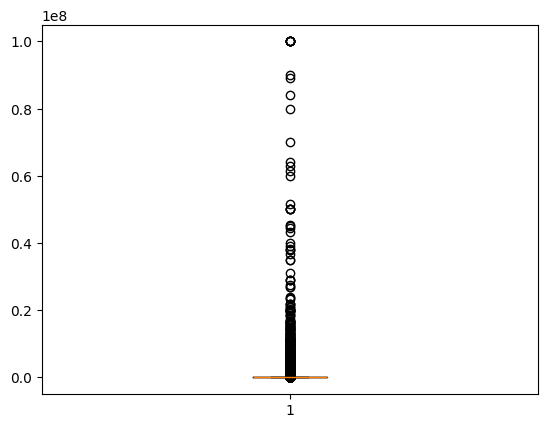

In [342]:
plt.boxplot(df2.full_price)

In [343]:
df2 = df2.drop(df2[(df2.full_price<50)|(df2.full_price>5e9)].index)

In [344]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  object 
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

{'whiskers': [<matplotlib.lines.Line2D at 0x195bf978950>,
 'caps': [<matplotlib.lines.Line2D at 0x195bf979c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x195bf978090>],
 'medians': [<matplotlib.lines.Line2D at 0x195bf97b090>],
 'fliers': [<matplotlib.lines.Line2D at 0x195bf97ba90>],
 'means': []}

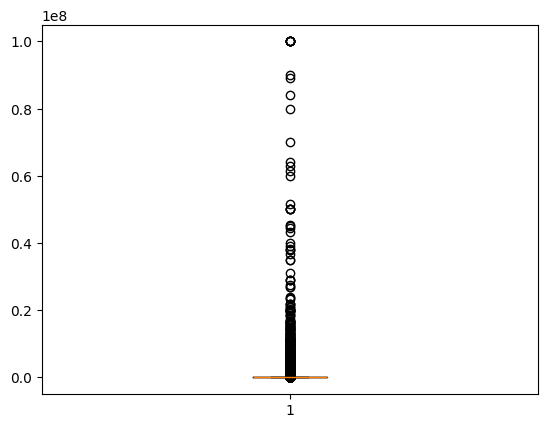

In [345]:
plt.boxplot(df2.full_price)

<Axes: >

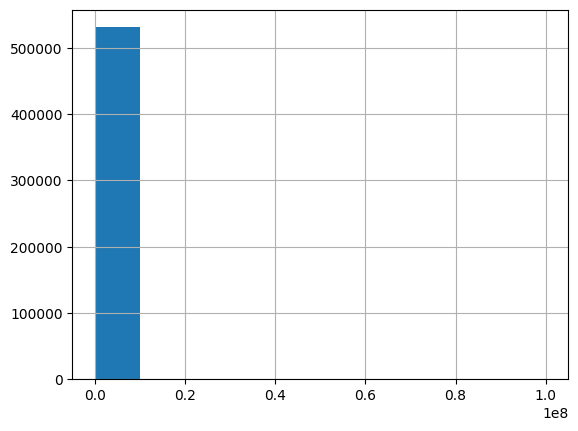

In [346]:
df2.full_price.hist()

In [347]:
def replace_outliers(df, c_name):
    c = df[c_name]
    c = df[c_name].astype(float)
    q1 = c.quantile(0.25)
    q3 = c.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    c = np.where(c>upper, upper, c)
    c = np.where(c<lower, lower, c)
    df.loc[:, c_name] = c
    return df

In [348]:
df2 = replace_outliers(df2, 'full_price')

{'whiskers': [<matplotlib.lines.Line2D at 0x195c33000d0>,
 'caps': [<matplotlib.lines.Line2D at 0x195c3301410>,
 'boxes': [<matplotlib.lines.Line2D at 0x195bf8db750>],
 'medians': [<matplotlib.lines.Line2D at 0x195c3302810>],
 'fliers': [<matplotlib.lines.Line2D at 0x195c33030d0>],
 'means': []}

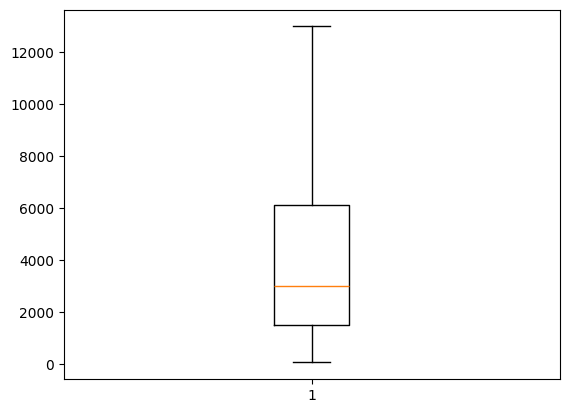

In [349]:
plt.boxplot(df2.full_price)

<Axes: >

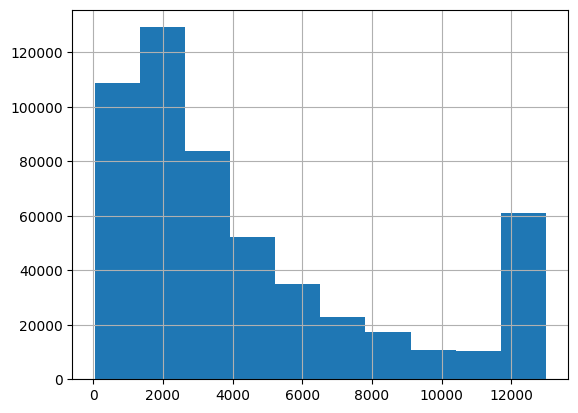

In [350]:
df2.full_price.hist()

In [351]:
df2.sort_values(by='full_price')

,cat3_slug,city_slug,neighborhood_slug,created_at_month,land_size,building_size,deed_type,floor,rooms_count,total_floors_count,...,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,location_latitude,location_longitude,location_radius,category,full_price
9217,industry-agriculture-business-sell,zanjan,NaN,2024-12-01 00:00:00,NaN,10000.0,NaN,NaN,بدون اتاق,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر کوچک,50.0
159599,shop-sell,kashan,NaN,2024-09-01 00:00:00,NaN,40.0,NaN,NaN,یک,NaN,...,NaN,NaN,NaN,NaN,NaN,33.933147,51.463207,NaN,شهر کوچک,50.0
237128,apartment-sell,tehran,darvazeh-shemiran,2024-10-01 00:00:00,NaN,69.0,multi_page,4,یک,4,...,heater,water_cooler,squat,north,stone,35.695427,51.440186,NaN,کلان‌شهر,50.0
72966,plot-old,mashhad,bolvartoos,2024-06-01 00:00:00,NaN,120.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.373890,59.547398,NaN,کلان‌شهر,50.0
375446,house-villa-sell,ahvaz,zergan,2024-06-01 00:00:00,270.0,270.0,NaN,NaN,سه,NaN,...,NaN,NaN,NaN,NaN,NaN,31.395395,48.800407,NaN,کلان‌شهر,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,apartment-sell,tehran,ekhtiyariyeh,2024-12-01 00:00:00,NaN,150.0,single_page,1,سه,5,...,NaN,NaN,squat_seat,north,stone,35.785004,51.454659,NaN,کلان‌شهر,12985.0
40,office-sell,isfahan,aineh-khaneh,2024-10-01 00:00:00,NaN,50.0,NaN,4,یک,NaN,...,NaN,NaN,NaN,NaN,NaN,32.636444,51.666637,NaN,کلان‌شهر,12985.0
545947,apartment-sell,shiraz,moaliabad,2024-10-01 00:00:00,NaN,260.0,NaN,4.0,سه,NaN,...,NaN,NaN,NaN,NaN,NaN,29.679001,52.461166,NaN,کلان‌شهر,12985.0
545959,apartment-sell,tehran,gisha,2024-05-01 00:00:00,NaN,164.0,single_page,3.0,سه,5.0,...,shoofaj,water_cooler,squat_seat,north,stone,35.728760,51.378708,500.0,کلان‌شهر,12985.0


In [352]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  object 
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

In [353]:
df2['created_at_month'] = pd.to_datetime(df2['created_at_month'])

In [354]:
df2['created_at_month'].apply(lambda x: x.year).value_counts()

created_at_month
2024    529362
2023      1111
2025       916
2022        26
2021         2
Name: count, dtype: int64

In [355]:
df2['year'] = df2['created_at_month'].apply(lambda x: x.year)
df2 = df2[df2.year==2024]
df2 = df2.drop(['created_at_month', 'year'], axis=1)

In [356]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529362 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529362 non-null  object 
 1   city_slug                529362 non-null  object 
 2   neighborhood_slug        228864 non-null  object 
 3   land_size                108189 non-null  float64
 4   building_size            528141 non-null  float64
 5   deed_type                240621 non-null  object 
 6   floor                    297309 non-null  object 
 7   rooms_count              429404 non-null  object 
 8   total_floors_count       181409 non-null  object 
 9   unit_per_floor           179256 non-null  object 
 10  has_balcony              296627 non-null  object 
 11  has_elevator             297309 non-null  object 
 12  has_warehouse            405502 non-null  object 
 13  has_parking              405502 non-null  object 
 14  construct

## split data into train, validation, and test

In [357]:
X = df2.drop(['full_price'], axis=1)
y = df2['full_price']

In [419]:
X_train, X_test1, y_train, y_test1 = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [420]:
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test1, y_test1, test_size=0.4, random_state=42)

In [421]:
train_data = pd.concat([X_train, pd.DataFrame(y_train)], axis=1).reset_index().drop(columns=['index'])

In [422]:
X_valid = X_valid.reset_index().drop(columns=['index'])
X_test = X_test.reset_index().drop(columns=['index'])

In [423]:
train_data.groupby(['city_slug', 'neighborhood_slug'])['full_price'].mean().to_csv('price_group.csv')

## Handling missing values

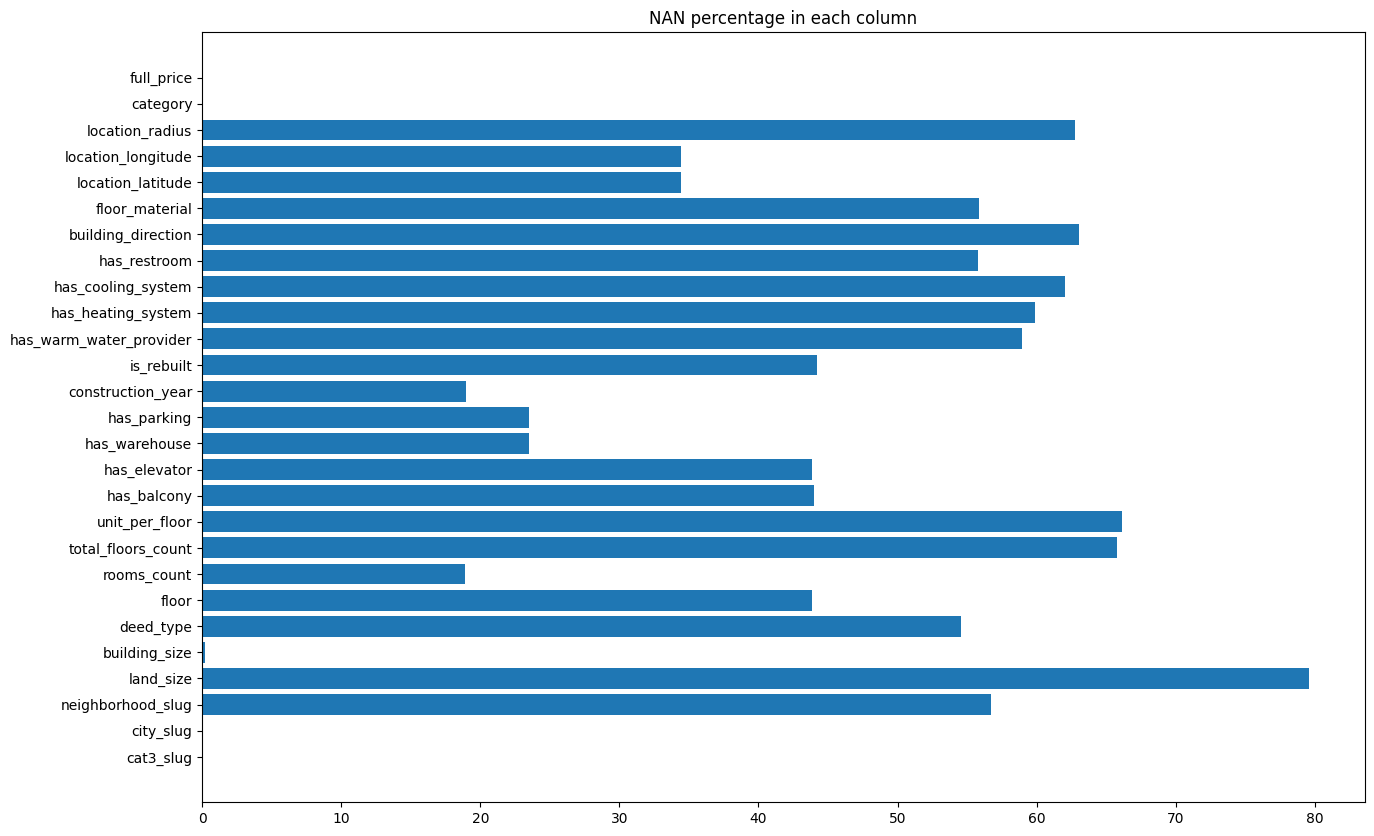

In [424]:
perc = train_data.isna().sum()*100/len(train_data)

gs = GridSpec(1, 1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(gs[0, 0])
ax.barh(train_data.columns, perc.values)
plt.title('NAN percentage in each column')
plt.show()

### neighborhood_slug

In [425]:
train_data.city_slug.value_counts()

city_slug
tehran        58282
mashhad       21103
karaj         16742
isfahan       12199
shiraz        11013
              ...  
kiasar           32
hendijan         29
shal             29
lavandevil       25
hormuz           11
Name: count, Length: 240, dtype: int64

In [426]:
train_data.groupby(['city_slug'])['neighborhood_slug'].apply(pd.Series.mode)

city_slug       
ahvaz          0              kianpars
bandar-anzali  0          chaharfarize
isfahan        0    baharestan-esfahan
karaj          0       andishehnewcity
lahijan        0               ahandan
               1      golestan-lahijan
               2                   lil
mashhad        0          elahiyehblvd
qom            0         pardisan-ghom
rasht          0               golsaar
shiraz         0              mianrood
talesh         0              hashtpar
tehran         0                poonak
Name: neighborhood_slug, dtype: object

In [427]:
train_data['neighborhood_slug'].value_counts()

neighborhood_slug
elahiyehblvd                  2778
poonak                        1692
ghasemabad                    1602
bolvartoos                    1592
jeyhoun                       1395
                              ... 
abbas-abad-bandar-e-anzali       1
naxodchar                        1
enqelab-lahijan                  1
jokandan                         1
yusef-abad                       1
Name: count, Length: 1155, dtype: int64

As you see, most of the cities don't have neighborhood_slug. We can concat this column with city and create a new column.

In [428]:
train_data['neighborhood_slug'] = train_data['neighborhood_slug'].fillna('')
X_valid['neighborhood_slug'] = X_valid['neighborhood_slug'].fillna('')
X_test['neighborhood_slug'] = X_test['neighborhood_slug'].fillna('')

In [429]:
train_data['city_neighborhood'] = train_data['city_slug'] + train_data['neighborhood_slug']
X_valid['city_neighborhood'] = X_valid['city_slug'] + X_valid['neighborhood_slug']
X_test['city_neighborhood'] = X_test['city_slug'] + X_test['neighborhood_slug']

In [430]:
train_data['city_neighborhood'].value_counts()

city_neighborhood
tabriz                    10284
andisheh-new-town          9333
kermanshah                 5133
pardis-city                4736
urmia                      4561
                          ...  
isfahanferdos                 1
lahijanbazkiya-gurab          1
lahijanenqelab-lahijan        1
taleshjokandan                1
lahijanyusef-abad             1
Name: count, Length: 1387, dtype: int64

In [431]:
train_data = train_data.drop(['city_slug', 'neighborhood_slug'], axis=1)
X_valid = X_valid.drop(['city_slug', 'neighborhood_slug'], axis=1)
X_test = X_test.drop(['city_slug', 'neighborhood_slug'], axis=1)

### building_size

In [432]:
sum(train_data['building_size'].isna())

726

In [433]:
train_data[train_data['building_size'].isna()]['city_neighborhood'].unique()

array(['kerman', 'pakdasht-city', 'mashhadelahiyehblvd', 'khorramabad',
       'karajgohardasht', 'kermanshah', 'sadra', 'lahijan', 'semnan',
       'eslamshahr', 'kashan', 'tehranelm-o-sanat', 'tabriz',
       'karajsamandehi', 'khalkhal', 'isfahandastgerd',
       'tehrantehran-iran', 'zahedan', 'tehrantehran-lashkar',
       'shiraztondgooyan', 'pardis-city', 'gorgan', 'rashtesteghamat',
       'isfahanrahim-abad', 'someh-sara', 'chahar-dangeh',
       'andisheh-new-town', 'tehrantehransar', 'borujerd', 'hamedan',
       'tehranfiroozabadi', 'talesh', 'mashhadkuy-e-amiralmomenin',
       'tehranhavanirooz', 'mashhadahmadabad', 'karajgolshahr',
       'mashhadazadshahr', 'qomjomhoori', 'mashhadfareqoltahsilan',
       'mashhadkuy-e-sarafrazan', 'mohammad-shahr', 'shirazarian-town',
       'karajettehad', 'shahin-shahr', 'mashhadjanbaz', 'qazvin',
       'tehranchitgar', 'saveh', 'arak', 'tehranelahiyeh',
       'ahvazkianabad', 'qomensejam', 'isfahannasr-abad-isfahan',
       'ahvazf

In [434]:
group_temp = train_data.groupby(['city_neighborhood'])['building_size'].median().reset_index().rename(columns={'building_size': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['building_size'] = train_data['building_size'].fillna(train_temp['med'])

In [435]:
sum(X_valid['building_size'].isna()), sum(X_test['building_size'].isna())

(296, 199)

In [436]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['building_size'] = X_valid['building_size'].fillna(valid_temp['med'])

In [437]:
test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['building_size'] = X_test['building_size'].fillna(test_temp['med'])

In [438]:
sum(X_valid['building_size'].isna()), sum(X_test['building_size'].isna())

(0, 0)

### land size

In [439]:
group_temp = train_data.groupby(['building_size'])['land_size'].median().ffill().reset_index().rename(columns={'land_size': 'med'})

train_temp = train_data[['building_size']].merge(group_temp, on=['building_size'], how='left')
train_data['land_size'] = train_data['land_size'].fillna(train_temp['med'])

In [440]:
sum(X_valid['land_size'].isna()), sum(X_test['land_size'].isna())

(100826, 67536)

In [441]:
valid_temp = X_valid[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_valid['land_size'] = X_valid['land_size'].fillna(valid_temp['med'])

test_temp = X_test[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_test['land_size'] = X_test['land_size'].fillna(test_temp['med'])

In [442]:
sum(X_valid['land_size'].isna()), sum(X_test['land_size'].isna())

(334, 218)

In [443]:
X_valid['land_size'] = X_valid['land_size'].fillna(X_valid['building_size'])

X_test['land_size'] = X_test['land_size'].fillna(X_test['building_size'])

In [444]:
sum(X_valid['land_size'].isna()), sum(X_test['land_size'].isna())

(0, 0)

### deed_type

In [445]:
train_data.deed_type.value_counts()

deed_type
single_page          111438
written_agreement     17782
other                 11321
multi_page             3423
unselect                315
Name: count, dtype: int64

In [446]:
train_data.loc[train_data['deed_type']=='unselect','deed_type'] = None
X_valid.loc[X_valid['deed_type']=='unselect','deed_type'] = None
X_test.loc[X_test['deed_type']=='unselect','deed_type'] = None

first we need to convert it to numerical

In [447]:
le = LabelEncoder()
train_data['deed_type'] = le.fit_transform(train_data['deed_type'])
X_valid['deed_type'] = le.transform(X_valid['deed_type'])
X_test['deed_type'] = le.transform(X_test['deed_type'])

In [448]:
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean', add_indicator=False)

In [449]:
train_data[['deed_type']] = imputer.fit_transform(train_data[['deed_type']])
X_valid[['deed_type']] = imputer.transform(X_valid[['deed_type']])
X_test[['deed_type']] = imputer.transform(X_test[['deed_type']])

### total_floors_count

In [450]:
train_data['total_floors_count'].value_counts()

total_floors_count
4           32865
5           30362
3           17670
6           11363
2            5001
7            3219
8            1657
14           1374
10            965
9             667
12            615
11            544
13            466
15            377
16            293
20            201
18            171
21            137
25            124
17             97
19             94
30             93
30+            81
24             65
22             56
29             44
unselect       38
26             24
5.0            23
4.0            20
23             19
27             12
28             10
3.0             9
6.0             7
2.0             5
10.0            2
25.0            1
11.0            1
13.0            1
12.0            1
19.0            1
20.0            1
Name: count, dtype: int64

In [451]:
train_data.loc[train_data['total_floors_count']=='30+','total_floors_count'] = '30'
X_valid.loc[X_valid['total_floors_count']=='30+','total_floors_count'] = '30'
X_test.loc[X_test['total_floors_count']=='30+','total_floors_count'] = '30'

In [452]:
train_data.loc[train_data['total_floors_count']=='unselect','total_floors_count'] = None
X_valid.loc[X_valid['total_floors_count']=='unselect','total_floors_count'] = None
X_test.loc[X_test['total_floors_count']=='unselect','total_floors_count'] = None

In [453]:
train_data['total_floors_count'] = train_data['total_floors_count'].astype('float')
X_valid['total_floors_count'] = X_valid['total_floors_count'].astype('float')
X_test['total_floors_count'] = X_test['total_floors_count'].astype('float')

In [454]:
train_data.groupby(['city_neighborhood'])['total_floors_count'].median().reset_index().isna().sum()

city_neighborhood       0
total_floors_count    118
dtype: int64

In [455]:
group_temp = train_data.groupby(['city_neighborhood'])['total_floors_count'].median().reset_index().ffill().rename(columns={'total_floors_count': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['total_floors_count'] = train_data['total_floors_count'].fillna(train_temp['med'])

In [456]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['total_floors_count'] = X_valid['total_floors_count'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['total_floors_count'] = X_test['total_floors_count'].fillna(test_temp['med'])

In [457]:
sum(X_valid['total_floors_count'].isna()), sum(X_test['total_floors_count'].isna())

(12, 9)

In [458]:
med_total_foors = train_data['total_floors_count'].median()
X_valid['total_floors_count'] = X_valid['total_floors_count'].fillna(med_total_foors)
X_test['total_floors_count'] = X_test['total_floors_count'].fillna(med_total_foors)

In [459]:
train_data['total_floors_count'] = train_data['total_floors_count'].astype('int')
X_valid['total_floors_count'] = X_valid['total_floors_count'].astype('int')
X_test['total_floors_count'] = X_test['total_floors_count'].astype('int')

### floor

In [460]:
train_data['floor'].value_counts()

floor
2       42507
3       37865
1       37287
4       25579
5       13451
0        8522
6        5014
7        2013
8        1140
10        842
9         782
-1        546
11        534
12        478
13        315
14        302
30+       228
15        162
16        104
17         92
18         76
20         71
19         49
21         37
25         33
2.0        29
22         28
23         27
1.0        26
24         22
3.0        22
30         21
4.0        16
28         11
27          8
5.0         7
0.0         7
26          7
29          6
7.0         3
6.0         1
20.0        1
10.0        1
22.0        1
11.0        1
9.0         1
Name: count, dtype: int64

In [461]:
train_data.loc[train_data['floor']=='30+','floor'] = '30'
X_valid.loc[X_valid['floor']=='30+','floor'] = '30'
X_test.loc[X_test['floor']=='30+','floor'] = '30'

In [462]:
train_data['floor'] = train_data['floor'].astype('float')
X_valid['floor'] = X_valid['floor'].astype('float')
X_test['floor'] = X_test['floor'].astype('float')

In [463]:
train_data.groupby(['total_floors_count'])['floor'].median().reset_index().isna().sum()

total_floors_count    0
floor                 0
dtype: int64

In [464]:
group_temp = train_data.groupby(['total_floors_count'])['floor'].median().reset_index().rename(columns={'floor': 'med'})

train_temp = train_data[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
train_data['floor'] = train_data['floor'].fillna(train_temp['med'])

In [465]:
valid_temp = X_valid[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
X_valid['floor'] = X_valid['floor'].fillna(valid_temp['med'])

test_temp = X_test[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
X_test['floor'] = X_test['floor'].fillna(test_temp['med'])

In [466]:
sum(X_valid['floor'].isna()), sum(X_test['floor'].isna())

(0, 0)

In [467]:
train_data['floor'] = train_data['floor'].astype('int')
X_valid['floor'] = X_valid['floor'].astype('int')
X_test['floor'] = X_test['floor'].astype('int')

### unit_per_floor

In [468]:
train_data['unit_per_floor'].value_counts()

unit_per_floor
2              43830
1              31275
4              14330
3              11872
5               1817
6               1805
8               1328
more_than_8      839
7                356
unselect          74
Name: count, dtype: int64

In [469]:
train_data.loc[train_data['unit_per_floor']=='more_than_8','unit_per_floor'] = '9'
X_valid.loc[X_valid['unit_per_floor']=='more_than_8','unit_per_floor'] = '9'
X_test.loc[X_test['unit_per_floor']=='more_than_8','unit_per_floor'] = '9'

In [470]:
train_data.loc[train_data['unit_per_floor']=='unselect','unit_per_floor'] = None
X_valid.loc[X_valid['unit_per_floor']=='unselect','unit_per_floor'] = None
X_test.loc[X_test['unit_per_floor']=='unselect','unit_per_floor'] = None

In [471]:
train_data['unit_per_floor'] = train_data['unit_per_floor'].astype('float')
X_valid['unit_per_floor'] = X_valid['unit_per_floor'].astype('float')
X_test['unit_per_floor'] = X_test['unit_per_floor'].astype('float')

In [472]:
group_temp = train_data.groupby(['total_floors_count'])['unit_per_floor'].median().reset_index().rename(columns={'unit_per_floor': 'med'})

train_temp = train_data[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
train_data['unit_per_floor'] = train_data['unit_per_floor'].fillna(train_temp['med'])

In [473]:
valid_temp = X_valid[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
X_valid['unit_per_floor'] = X_valid['unit_per_floor'].fillna(valid_temp['med'])

test_temp = X_test[['total_floors_count']].merge(group_temp, on=['total_floors_count'], how='left')
X_test['unit_per_floor'] = X_test['unit_per_floor'].fillna(test_temp['med'])

In [474]:
train_data['unit_per_floor'] = train_data['unit_per_floor'].astype('int')
X_valid['unit_per_floor'] = X_valid['unit_per_floor'].astype('int')
X_test['unit_per_floor'] = X_test['unit_per_floor'].astype('int')

### rooms count

In [475]:
train_data['rooms_count'].value_counts()

rooms_count
دو              133867
یک               50674
سه               47934
بدون اتاق        12790
چهار              7889
پنج یا بیشتر      4344
Name: count, dtype: int64

In [476]:
X_valid['rooms_count'].value_counts()

rooms_count
دو              53874
یک              20080
سه              19316
بدون اتاق        5056
چهار             3066
پنج یا بیشتر     1744
Name: count, dtype: int64

In [477]:
X_test['rooms_count'].value_counts()

rooms_count
دو              35818
یک              13489
سه              12884
بدون اتاق        3411
چهار             2028
پنج یا بیشتر     1140
Name: count, dtype: int64

In [478]:
room_dic = {'یک':1, 'دو':2, 'سه': 3, 'بدون اتاق':0, 'چهار': 4, 'پنج یا بیشتر': 5}

In [479]:
train_data['rooms_count'] = train_data['rooms_count'].map(room_dic)
X_valid['rooms_count'] = X_valid['rooms_count'].map(room_dic)
X_test['rooms_count'] = X_test['rooms_count'].map(room_dic)

In [480]:
group_temp = train_data.groupby(['building_size'])['rooms_count'].median().ffill().reset_index().rename(columns={'rooms_count': 'med'})

train_temp = train_data[['building_size']].merge(group_temp, on=['building_size'], how='left')
train_data['rooms_count'] = train_data['rooms_count'].fillna(train_temp['med'])

In [481]:
valid_temp = X_valid[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_valid['rooms_count'] = X_valid['rooms_count'].fillna(valid_temp['med'])

test_temp = X_test[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_test['rooms_count'] = X_test['rooms_count'].fillna(test_temp['med'])

In [482]:
sum(X_valid['rooms_count'].isna()), sum(X_test['rooms_count'].isna())

(235, 156)

In [483]:
med_rooms_count = train_data['rooms_count'].median()
X_valid['rooms_count'] = X_valid['rooms_count'].fillna(med_rooms_count)

X_test['rooms_count'] = X_test['rooms_count'].fillna(med_rooms_count)

In [484]:
sum(X_valid['rooms_count'].isna()), sum(X_test['rooms_count'].isna())

(0, 0)

In [486]:
train_data['rooms_count'] = train_data['rooms_count'].astype('int')
X_valid['rooms_count'] = X_valid['rooms_count'].astype('int')
X_test['rooms_count'] = X_test['rooms_count'].astype('int')

### location ('location_latitude', 'location_longitude', 'location_radius')

#### location_latitude

In [487]:
train_data.groupby(['city_neighborhood'])['location_latitude'].median().reset_index().isna().sum()

city_neighborhood    0
location_latitude    6
dtype: int64

In [488]:
group_temp = train_data.groupby(['city_neighborhood'])['location_latitude'].median().reset_index().ffill().rename(columns={'location_latitude': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['location_latitude'] = train_data['location_latitude'].fillna(train_temp['med'])

In [489]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['location_latitude'] = X_valid['location_latitude'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['location_latitude'] = X_test['location_latitude'].fillna(test_temp['med'])

#### location_longitude

In [490]:
train_data.groupby(['city_neighborhood'])['location_longitude'].median().reset_index().isna().sum()

city_neighborhood     0
location_longitude    6
dtype: int64

In [491]:
group_temp = train_data.groupby(['city_neighborhood'])['location_longitude'].median().reset_index().ffill().rename(columns={'location_longitude': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['location_longitude'] = train_data['location_longitude'].fillna(train_temp['med'])

In [492]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['location_longitude'] = X_valid['location_longitude'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['location_longitude'] = X_test['location_longitude'].fillna(test_temp['med'])

#### location_radius

In [493]:
train_data.groupby(['city_neighborhood'])['location_radius'].median().reset_index().isna().sum()

city_neighborhood     0
location_radius      74
dtype: int64

In [494]:
group_temp = train_data.groupby(['city_neighborhood'])['location_radius'].median().reset_index().ffill().rename(columns={'location_radius': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['location_radius'] = train_data['location_radius'].fillna(train_temp['med'])

In [495]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['location_radius'] = X_valid['location_radius'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['location_radius'] = X_test['location_radius'].fillna(test_temp['med'])

### floor_material

In [496]:
train_data['floor_material'].value_counts()

floor_material
ceramic             108962
stone                12914
wood_parquet          5208
carpet                4547
mosaic                4136
laminate_parquet      3350
floor_covering         626
unselect               542
Name: count, dtype: int64

In [497]:
train_data.groupby(['city_neighborhood'])['floor_material'].apply(pd.Series.mode).reset_index().isna().sum()

city_neighborhood    0
level_1              0
floor_material       0
dtype: int64

In [498]:
group_temp = train_data.groupby(['city_neighborhood'])['floor_material'].apply(pd.Series.mode).reset_index().rename(columns={'floor_material': 'mode'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['floor_material'] = train_data['floor_material'].fillna(train_temp['mode'])

In [499]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['floor_material'] = X_valid['floor_material'].fillna(valid_temp['mode'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['floor_material'] = X_test['floor_material'].fillna(test_temp['mode'])

### building direction

In [500]:
train_data['building_direction'].value_counts()

building_direction
south       58445
north       51093
east         4197
west         2494
unselect     1160
Name: count, dtype: int64

In [501]:
train_data.groupby(['city_neighborhood'])['building_direction'].apply(pd.Series.mode).reset_index().isna().sum()

city_neighborhood     0
level_1               0
building_direction    0
dtype: int64

In [502]:
group_temp = train_data.groupby(['city_neighborhood'])['building_direction'].apply(pd.Series.mode).reset_index().rename(columns={'building_direction': 'mode'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['building_direction'] = train_data['building_direction'].fillna(train_temp['mode'])

In [503]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['building_direction'] = X_valid['building_direction'].fillna(valid_temp['mode'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['building_direction'] = X_test['building_direction'].fillna(test_temp['mode'])

### construction_year

In [504]:
train_data['construction_year'].value_counts()

construction_year
1403.0    48082
1402.0    22362
1400.0    14347
1390.0    13968
1395.0    13787
1401.0    11603
1397.0    10715
1398.0    10652
1396.0    10484
1385.0     9725
1393.0     9129
1399.0     8370
1394.0     8279
1392.0     7849
1388.0     7307
1369.0     6526
1380.0     6140
1391.0     5209
1389.0     5014
1387.0     4558
1386.0     4510
1383.0     3494
1384.0     3157
1382.0     2508
1375.0     2106
1371.0     1610
1381.0     1345
1378.0     1055
1379.0      776
1377.0      669
1372.0      606
1373.0      587
1376.0      534
1374.0      403
Name: count, dtype: int64

In [505]:
group_temp = train_data.groupby(['city_neighborhood'])['construction_year'].median().reset_index().ffill().rename(columns={'construction_year': 'med'})

train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['construction_year'] = train_data['construction_year'].fillna(train_temp['med'])

In [506]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['construction_year'] = X_valid['construction_year'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['construction_year'] = X_test['construction_year'].fillna(test_temp['med'])

In [507]:
def setOldCate(x):
    if this_year - x < 5:
        return 1
    elif this_year - x < 10:
        return 10
    elif this_year - x < 20:
        return 20
    else:
        return 30

In [508]:
train_data['age_category'] = train_data['construction_year'].apply(setOldCate)
X_valid['age_category'] = X_valid['construction_year'].apply(setOldCate)
X_test['age_category'] = X_test['construction_year'].apply(setOldCate)

### has_restroom

In [509]:
train_data['has_restroom'].value_counts()

has_restroom
squat_seat    82848
squat         54970
seat           2330
unselect        205
Name: count, dtype: int64

In [510]:
train_data.loc[train_data['has_restroom']=='unselect','has_restroom'] = None
X_valid.loc[X_valid['has_restroom']=='unselect','has_restroom'] = None
X_test.loc[X_test['has_restroom']=='unselect','has_restroom'] = None

In [511]:
train_data.groupby(['age_category'])['has_restroom'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_restroom
0,1,0,squat_seat
1,10,0,squat_seat
2,20,0,squat
3,30,0,squat


In [512]:
group_temp = train_data.groupby(['age_category'])['has_restroom'].apply(pd.Series.mode).reset_index().rename(columns={'has_restroom': 'mode'})

train_temp = train_data[['age_category']].merge(group_temp, on=['age_category'], how='left')
train_data['has_restroom'] = train_data['has_restroom'].fillna(train_temp['mode'])

In [513]:
valid_temp = X_valid[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_valid['has_restroom'] = X_valid['has_restroom'].fillna(valid_temp['mode'])

test_temp = X_test[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_test['has_restroom'] = X_test['has_restroom'].fillna(test_temp['mode'])

### is_rebuilt

In [514]:
train_data['is_rebuilt'].value_counts()

is_rebuilt
False    116751
True      60480
Name: count, dtype: int64

In [515]:
group_temp = train_data.groupby(['age_category'])['is_rebuilt'].apply(pd.Series.mode).reset_index().rename(columns={'is_rebuilt': 'mode'})

train_temp = train_data[['age_category']].merge(group_temp, on=['age_category'], how='left')
train_data['is_rebuilt'] = train_data['is_rebuilt'].fillna(train_temp['mode'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_15344\2810528472.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['is_rebuilt'] = train_data['is_rebuilt'].fillna(train_temp['mode'])


In [516]:
valid_temp = X_valid[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_valid['is_rebuilt'] = X_valid['is_rebuilt'].fillna(valid_temp['mode'])

test_temp = X_test[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_test['is_rebuilt'] = X_test['is_rebuilt'].fillna(test_temp['mode'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_15344\2965058927.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_valid['is_rebuilt'] = X_valid['is_rebuilt'].fillna(valid_temp['mode'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_15344\2965058927.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['is_rebuilt'] = X_test['is_rebuilt'].fillna(test_temp['mode'])


In [518]:
train_data['is_rebuilt']

0         False
1         False
2          True
3         False
4         False
          ...  
317612    False
317613    False
317614    False
317615    False
317616    False
Name: is_rebuilt, Length: 317617, dtype: bool

In [ ]:
train_data['is_rebuilt'] = train_data['is_rebuilt'].map({False:0, True:1})
X_valid['is_rebuilt'] = X_valid['is_rebuilt'].map({False:0, True:1})
X_test['is_rebuilt'] = X_test['is_rebuilt'].map({False:0, True:1})

### has_warm_water_provider

In [522]:
train_data['has_warm_water_provider'].value_counts()

has_warm_water_provider
package         78435
water_heater    41307
powerhouse      10125
unselect          498
Name: count, dtype: int64

In [523]:
train_data.loc[train_data['has_warm_water_provider']=='unselect','has_warm_water_provider'] = None
X_valid.loc[X_valid['has_warm_water_provider']=='unselect','has_warm_water_provider'] = None
X_test.loc[X_test['has_warm_water_provider']=='unselect','has_warm_water_provider'] = None

In [524]:
train_data.groupby(['age_category'])['has_warm_water_provider'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_warm_water_provider
0,1,0,package
1,10,0,package
2,20,0,water_heater
3,30,0,water_heater


In [525]:
group_temp = train_data.groupby(['age_category'])['has_warm_water_provider'].apply(pd.Series.mode).reset_index().rename(columns={'has_warm_water_provider': 'mode'})

train_temp = train_data[['age_category']].merge(group_temp, on=['age_category'], how='left')
train_data['has_warm_water_provider'] = train_data['has_warm_water_provider'].fillna(train_temp['mode'])

In [526]:
valid_temp = X_valid[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_valid['has_warm_water_provider'] = X_valid['has_warm_water_provider'].fillna(valid_temp['mode'])

test_temp = X_test[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_test['has_warm_water_provider'] = X_test['has_warm_water_provider'].fillna(test_temp['mode'])

### has_heating_system

In [528]:
train_data['has_heating_system'].value_counts()

has_heating_system
shoofaj          74615
heater           35566
duct_split        7858
floor_heating     3079
split             2207
fan_coil          1801
fireplace         1363
unselect           903
Name: count, dtype: int64

In [529]:
train_data.loc[train_data['has_heating_system']=='unselect','has_heating_system'] = None
X_valid.loc[X_valid['has_heating_system']=='unselect','has_heating_system'] = None
X_test.loc[X_test['has_heating_system']=='unselect','has_heating_system'] = None

In [530]:
train_data.groupby(['age_category'])['has_heating_system'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_heating_system
0,1,0,shoofaj
1,10,0,shoofaj
2,20,0,shoofaj
3,30,0,heater


In [531]:
group_temp = train_data.groupby(['age_category'])['has_heating_system'].apply(pd.Series.mode).reset_index().rename(columns={'has_heating_system': 'mode'})

train_temp = train_data[['age_category']].merge(group_temp, on=['age_category'], how='left')
train_data['has_heating_system'] = train_data['has_heating_system'].fillna(train_temp['mode'])

In [532]:
valid_temp = X_valid[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_valid['has_heating_system'] = X_valid['has_heating_system'].fillna(valid_temp['mode'])

test_temp = X_test[['age_category']].merge(group_temp, on=['age_category'], how='left')
X_test['has_heating_system'] = X_test['has_heating_system'].fillna(test_temp['mode'])

### has_cooling_system

In [533]:
train_data['has_cooling_system'].value_counts()

has_cooling_system
water_cooler       71401
air_conditioner    20197
split              14647
duct_split         10730
unselect            1874
fan_coil            1768
Name: count, dtype: int64

In [534]:
train_data.loc[train_data['has_cooling_system']=='unselect','has_cooling_system'] = None
X_valid.loc[X_valid['has_cooling_system']=='unselect','has_cooling_system'] = None
X_test.loc[X_test['has_cooling_system']=='unselect','has_cooling_system'] = None

In [535]:
train_data.groupby(['city_neighborhood'])['has_cooling_system'].apply(pd.Series.mode).reset_index()

,city_neighborhood,level_1,has_cooling_system
0,Iranshahr,0,air_conditioner
1,Kordkuy,0,split
2,abadan,0,air_conditioner
3,abadeh,0,water_cooler
4,abbasabad-mazandaran,0,air_conditioner
...,...,...,...
1356,zabol,0,water_cooler
1357,zahedan,0,water_cooler
1358,zanjan,0,water_cooler
1359,zarand,0,water_cooler


In [536]:
group_temp = train_data.groupby(['city_neighborhood'])['has_cooling_system'].apply(pd.Series.mode).reset_index().rename(columns={'has_cooling_system': 'mode'})


In [537]:
train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['has_cooling_system'] = train_data['has_cooling_system'].fillna(train_temp['mode'])

In [538]:
train_data['has_cooling_system'].isna().sum()

np.int64(159)

In [539]:
valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['has_cooling_system'] = X_valid['has_cooling_system'].fillna(valid_temp['mode'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['has_cooling_system'] = X_test['has_cooling_system'].fillna(test_temp['mode'])

In [540]:
sum(X_valid['has_cooling_system'].isna()), sum(X_test['has_cooling_system'].isna())

(84, 63)

In [ ]:
mode = train_data['has_cooling_system'].mode()[0]
train_data['has_cooling_system'] = train_data['has_cooling_system'].fillna(mode)
X_valid['has_cooling_system'] = X_valid['has_cooling_system'].fillna(mode)
X_test['has_cooling_system'] = X_test['has_cooling_system'].fillna(mode)

### has_balcony

In [547]:
train_data['has_balcony'].value_counts()

has_balcony
true        143294
false        25710
True          7476
False         1318
unselect        53
Name: count, dtype: int64

In [548]:
train_data.loc[train_data['has_balcony']=='unselect','has_balcony'] = None
X_valid.loc[X_valid['has_balcony']=='unselect','has_balcony'] = None
X_test.loc[X_test['has_balcony']=='unselect','has_balcony'] = None

In [549]:
train_data.loc[train_data['has_balcony']=='True','has_balcony'].value_counts()

has_balcony
True    7476
Name: count, dtype: int64

In [550]:
train_data.loc[train_data['has_balcony']=='true','has_balcony'] = 'True'
X_valid.loc[X_valid['has_balcony']=='true','has_balcony'] = 'True'
X_test.loc[X_test['has_balcony']=='true','has_balcony'] = 'True'

In [551]:
train_data.loc[train_data['has_balcony']=='false','has_balcony'] = 'False'
X_valid.loc[X_valid['has_balcony']=='false','has_balcony'] = 'False'
X_test.loc[X_test['has_balcony']=='false','has_balcony'] = 'False'

In [552]:
train_data['has_balcony']=train_data['has_balcony'].map({'False':0, 'True':1})
X_valid['has_balcony']=X_valid['has_balcony'].map({'False':0, 'True':1})
X_test['has_balcony']=X_test['has_balcony'].map({'False':0, 'True':1})

In [553]:
group_temp = train_data.groupby(['cat3_slug'])['has_balcony'].median().reset_index().rename(columns={'has_balcony': 'med'})

In [554]:
group_temp

,cat3_slug,med
0,apartment-rent,NaN
1,apartment-sell,1.0
2,house-villa-sell,1.0
3,industry-agriculture-business-rent,NaN
4,industry-agriculture-business-sell,NaN
5,office-rent,NaN
6,office-sell,NaN
7,partnership,NaN
8,plot-old,1.0
9,presell,NaN


In [555]:
group_temp.loc[group_temp['cat3_slug']=='apartment-rent', 'med']=1

In [556]:
group_temp = group_temp.fillna(0)

In [557]:
train_temp = train_data[['cat3_slug']].merge(group_temp, on=['cat3_slug'], how='left')
train_data['has_balcony'] = train_data['has_balcony'].fillna(train_temp['med'])

valid_temp = X_valid[['cat3_slug']].merge(group_temp, on=['cat3_slug'], how='left')
X_valid['has_balcony'] = X_valid['has_balcony'].fillna(valid_temp['med'])

test_temp = X_test[['cat3_slug']].merge(group_temp, on=['cat3_slug'], how='left')
X_test['has_balcony'] = X_test['has_balcony'].fillna(test_temp['med'])

In [567]:
sum(X_valid['has_cooling_system'].isna()), sum(X_test['has_cooling_system'].isna())

(0, 0)

In [559]:
train_data['has_balcony'] = train_data['has_balcony'].astype('int')
X_valid['has_balcony'] = X_valid['has_balcony'].astype('int')
X_test['has_balcony'] = X_test['has_balcony'].astype('int')

### has_elevator

In [560]:
train_data['has_elevator'].value_counts()

has_elevator
True     130056
False     48219
Name: count, dtype: int64

In [561]:
train_data['has_elevator']

0         False
1           NaN
2         False
3          True
4         False
          ...  
317612      NaN
317613      NaN
317614      NaN
317615      NaN
317616      NaN
Name: has_elevator, Length: 317617, dtype: object

In [562]:
train_data['has_elevator'].map({False:0, True:1})

0         0.0
1         NaN
2         0.0
3         1.0
4         0.0
         ... 
317612    NaN
317613    NaN
317614    NaN
317615    NaN
317616    NaN
Name: has_elevator, Length: 317617, dtype: float64

In [563]:
train_data['has_elevator']=train_data['has_elevator'].map({False:0, True:1})
X_valid['has_elevator']=X_valid['has_elevator'].map({False:0, True:1})
X_test['has_elevator']=X_test['has_elevator'].map({False:0, True:1})

In [564]:
group_temp = train_data.groupby(['city_neighborhood'])['has_elevator'].apply(pd.Series.mode).reset_index().rename(columns={'has_elevator': 'med'}).ffill()
group_temp 

,city_neighborhood,level_1,med
0,Iranshahr,0,0.0
1,Kordkuy,0,1.0
2,abadan,0,1.0
3,abadeh,0,0.0
4,abbasabad-mazandaran,0,1.0
...,...,...,...
1364,zabol,0,0.0
1365,zahedan,0,1.0
1366,zanjan,0,1.0
1367,zarand,0,0.0


In [565]:
train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['has_elevator'] = train_data['has_elevator'].fillna(train_temp['med'])

valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['has_elevator'] = X_valid['has_elevator'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['has_elevator'] = X_test['has_elevator'].fillna(test_temp['med'])

In [568]:
sum(X_valid['has_elevator'].isna()), sum(X_test['has_elevator'].isna())

(141, 88)

In [569]:
mode = train_data['has_elevator'].mode()[0]
train_data['has_elevator'] = train_data['has_elevator'].fillna(mode)
X_valid['has_elevator'] = X_valid['has_elevator'].fillna(mode)
X_test['has_elevator'] = X_test['has_elevator'].fillna(mode)

In [570]:
train_data['has_elevator'] = train_data['has_elevator'].astype('int')
X_valid['has_elevator'] = X_valid['has_elevator'].astype('int')
X_test['has_elevator'] = X_test['has_elevator'].astype('int')

### has_warehouse

In [571]:
train_data['has_warehouse'].value_counts()

has_warehouse
True     207076
False     36006
Name: count, dtype: int64

In [572]:
train_data['has_warehouse']=train_data['has_warehouse'].map({False:0, True:1})
X_valid['has_warehouse']=X_valid['has_warehouse'].map({False:0, True:1})
X_test['has_warehouse']=X_test['has_warehouse'].map({False:0, True:1})

In [ ]:
group_temp = train_data.groupby(['city_neighborhood'])['has_warehouse'].median().reset_index().rename(columns={'has_warehouse': 'med'}).ffill()
group_temp 

,city_neighborhood,level_1,med
0,Iranshahr,0,1.0
1,Kordkuy,0,1.0
2,abadan,0,1.0
3,abadeh,0,1.0
4,abbasabad-mazandaran,0,1.0
...,...,...,...
1386,zabol,0,1.0
1387,zahedan,0,1.0
1388,zanjan,0,1.0
1389,zarand,0,1.0


In [574]:
train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['has_warehouse'] = train_data['has_warehouse'].fillna(train_temp['med'])

valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['has_warehouse'] = X_valid['has_warehouse'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['has_warehouse'] = X_test['has_warehouse'].fillna(test_temp['med'])

In [575]:
sum(X_valid['has_warehouse'].isna()), sum(X_test['has_warehouse'].isna())

(3, 5)

In [577]:
med = train_data['has_warehouse'].median()
train_data['has_warehouse'] = train_data['has_warehouse'].fillna(med)
X_valid['has_warehouse'] = X_valid['has_warehouse'].fillna(med)
X_test['has_warehouse'] = X_test['has_warehouse'].fillna(med)

In [578]:
train_data['has_warehouse'] = train_data['has_warehouse'].astype('int')
X_valid['has_warehouse'] = X_valid['has_warehouse'].astype('int')
X_test['has_warehouse'] = X_test['has_warehouse'].astype('int')

### has_parking

In [579]:
train_data['has_parking'].value_counts()

has_parking
True     199117
False     43965
Name: count, dtype: int64

In [580]:
train_data['has_parking']=train_data['has_parking'].map({False:0, True:1})
X_valid['has_parking']=X_valid['has_parking'].map({False:0, True:1})
X_test['has_parking']=X_test['has_parking'].map({False:0, True:1})

In [581]:
group_temp = train_data.groupby(['city_neighborhood'])['has_parking'].median().reset_index().rename(columns={'has_parking': 'med'}).ffill()
group_temp 

,city_neighborhood,med
0,Iranshahr,1.0
1,Kordkuy,1.0
2,abadan,1.0
3,abadeh,1.0
4,abbasabad-mazandaran,1.0
...,...,...
1382,zabol,1.0
1383,zahedan,1.0
1384,zanjan,1.0
1385,zarand,1.0


In [582]:
train_temp = train_data[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
train_data['has_parking'] = train_data['has_parking'].fillna(train_temp['med'])

valid_temp = X_valid[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_valid['has_parking'] = X_valid['has_parking'].fillna(valid_temp['med'])

test_temp = X_test[['city_neighborhood']].merge(group_temp, on=['city_neighborhood'], how='left')
X_test['has_parking'] = X_test['has_parking'].fillna(test_temp['med'])

In [584]:
sum(X_valid['has_parking'].isna()), sum(X_test['has_parking'].isna())

(3, 5)

In [585]:
med = train_data['has_parking'].median()
train_data['has_parking'] = train_data['has_parking'].fillna(med)
X_valid['has_parking'] = X_valid['has_parking'].fillna(med)
X_test['has_parking'] = X_test['has_parking'].fillna(med)

In [586]:
train_data['has_parking'] = train_data['has_parking'].astype('int')
X_valid['has_parking'] = X_valid['has_parking'].astype('int')
X_test['has_parking'] = X_test['has_parking'].astype('int')

## Check data

In [587]:
perc = train_data.isna().sum()*100/len(train_data)
perc[perc!=0]

building_direction    0.034318
floor_material        0.021095
dtype: float64

In [588]:
perc = X_test.isna().sum()*100/len(X_test)
perc[perc!=0]

construction_year     0.005903
building_direction    0.054311
floor_material        0.035420
location_radius       0.011807
dtype: float64

In [589]:
perc = X_valid.isna().sum()*100/len(X_valid)
perc[perc!=0]

construction_year     0.002361
building_direction    0.052736
floor_material        0.044078
location_radius       0.011020
dtype: float64

In [590]:
valid_data = pd.concat([X_valid, pd.DataFrame(y_valid)], axis=1)
test_data = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)

In [591]:
train_data = train_data.dropna()
valid_data = valid_data.dropna()
test_data = test_data.dropna()

In [592]:
train_data.to_csv('E:/uni\AI quera\project\data_project1/train.csv')
valid_data.to_csv('E:/uni\AI quera\project\data_project1/valid.csv')
test_data.to_csv('E:/uni\AI quera\project\data_project1/test.csv')

In [593]:
train_data = pd.read_csv('E:/uni\AI quera\project\data_project1/train.csv')
valid_data = pd.read_csv('E:/uni\AI quera\project\data_project1/valid.csv')
test_data = pd.read_csv('E:/uni\AI quera\project\data_project1/test.csv')

In [597]:
train_data = train_data.drop('Unnamed: 0', axis=1)
valid_data = valid_data.drop('Unnamed: 0', axis=1)
test_data = test_data.drop('Unnamed: 0', axis=1)

# Categorical to Numerical

In [598]:
cat_cols = train_data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['cat3_slug',
 'has_warm_water_provider',
 'has_heating_system',
 'has_cooling_system',
 'has_restroom',
 'building_direction',
 'floor_material',
 'category',
 'city_neighborhood']

In [599]:
le = LabelEncoder()
enc = BinaryEncoder()
for c in cat_cols:
    if train_data[c].nunique() > 8:
        train_data[c] = le.fit_transform(train_data[c])
        valid_data[c] = valid_data[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)
        test_data[c] = test_data[c].map(lambda s: '<unknown>' if s not in le.classes_ else s)

        # Add '<unknown>' to classes and transform
        le.classes_ = np.append(le.classes_, '<unknown>')
        valid_data[c] = le.transform(valid_data[c])
        test_data[c] = le.transform(test_data[c])
    else:
        temp_train = enc.fit_transform(train_data[c])
        temp_valid = enc.transform(valid_data[c])
        temp_test = enc.transform(test_data[c])
        train_data = pd.concat([train_data, temp_train], axis=1)
        valid_data = pd.concat([valid_data, temp_valid], axis=1)
        test_data = pd.concat([test_data, temp_test], axis=1)

        train_data = train_data.drop(c, axis=1)
        valid_data = valid_data.drop(c, axis=1)
        test_data = test_data.drop(c, axis=1)

In [600]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317441 entries, 0 to 317440
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  317441 non-null  int64  
 1   land_size                  317441 non-null  float64
 2   building_size              317441 non-null  float64
 3   deed_type                  317441 non-null  float64
 4   floor                      317441 non-null  int64  
 5   rooms_count                317441 non-null  int64  
 6   total_floors_count         317441 non-null  int64  
 7   unit_per_floor             317441 non-null  int64  
 8   has_balcony                317441 non-null  int64  
 9   has_elevator               317441 non-null  int64  
 10  has_warehouse              317441 non-null  int64  
 11  has_parking                317441 non-null  int64  
 12  construction_year          317441 non-null  float64
 13  is_rebuilt                 31

In [601]:
valid_data.select_dtypes(include=['object']).columns.tolist()

[]

# Remove Outliers

In [609]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317441 entries, 0 to 317440
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  317441 non-null  int64  
 1   land_size                  317441 non-null  float64
 2   building_size              317441 non-null  float64
 3   deed_type                  317441 non-null  float64
 4   floor                      317441 non-null  int64  
 5   rooms_count                317441 non-null  int64  
 6   total_floors_count         317441 non-null  int64  
 7   unit_per_floor             317441 non-null  int64  
 8   has_balcony                317441 non-null  int64  
 9   has_elevator               317441 non-null  int64  
 10  has_warehouse              317441 non-null  int64  
 11  has_parking                317441 non-null  int64  
 12  construction_year          317441 non-null  float64
 13  is_rebuilt                 31

In [613]:
cols = train_data.select_dtypes(include=['float64']).columns.tolist()

In [614]:
cols

['land_size',
 'building_size',
 'deed_type',
 'construction_year',
 'location_latitude',
 'location_longitude',
 'location_radius',
 'full_price']

In [615]:
for c in cols:
    train_data = replace_outliers(train_data, c)

# Scaling

In [616]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317441 entries, 0 to 317440
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cat3_slug                  317441 non-null  int64  
 1   land_size                  317441 non-null  float64
 2   building_size              317441 non-null  float64
 3   deed_type                  317441 non-null  float64
 4   floor                      317441 non-null  int64  
 5   rooms_count                317441 non-null  int64  
 6   total_floors_count         317441 non-null  int64  
 7   unit_per_floor             317441 non-null  int64  
 8   has_balcony                317441 non-null  int64  
 9   has_elevator               317441 non-null  int64  
 10  has_warehouse              317441 non-null  int64  
 11  has_parking                317441 non-null  int64  
 12  construction_year          317441 non-null  float64
 13  is_rebuilt                 31

In [637]:
cols = train_data.columns

In [640]:
sc = MinMaxScaler()

train_data1 = pd.DataFrame(sc.fit_transform(train_data), columns=cols)
valid_data1 = pd.DataFrame(sc.transform(valid_data[cols]), columns=cols)
test_data1 = pd.DataFrame(sc.transform(test_data[cols]), columns=cols)

# Check Corelation

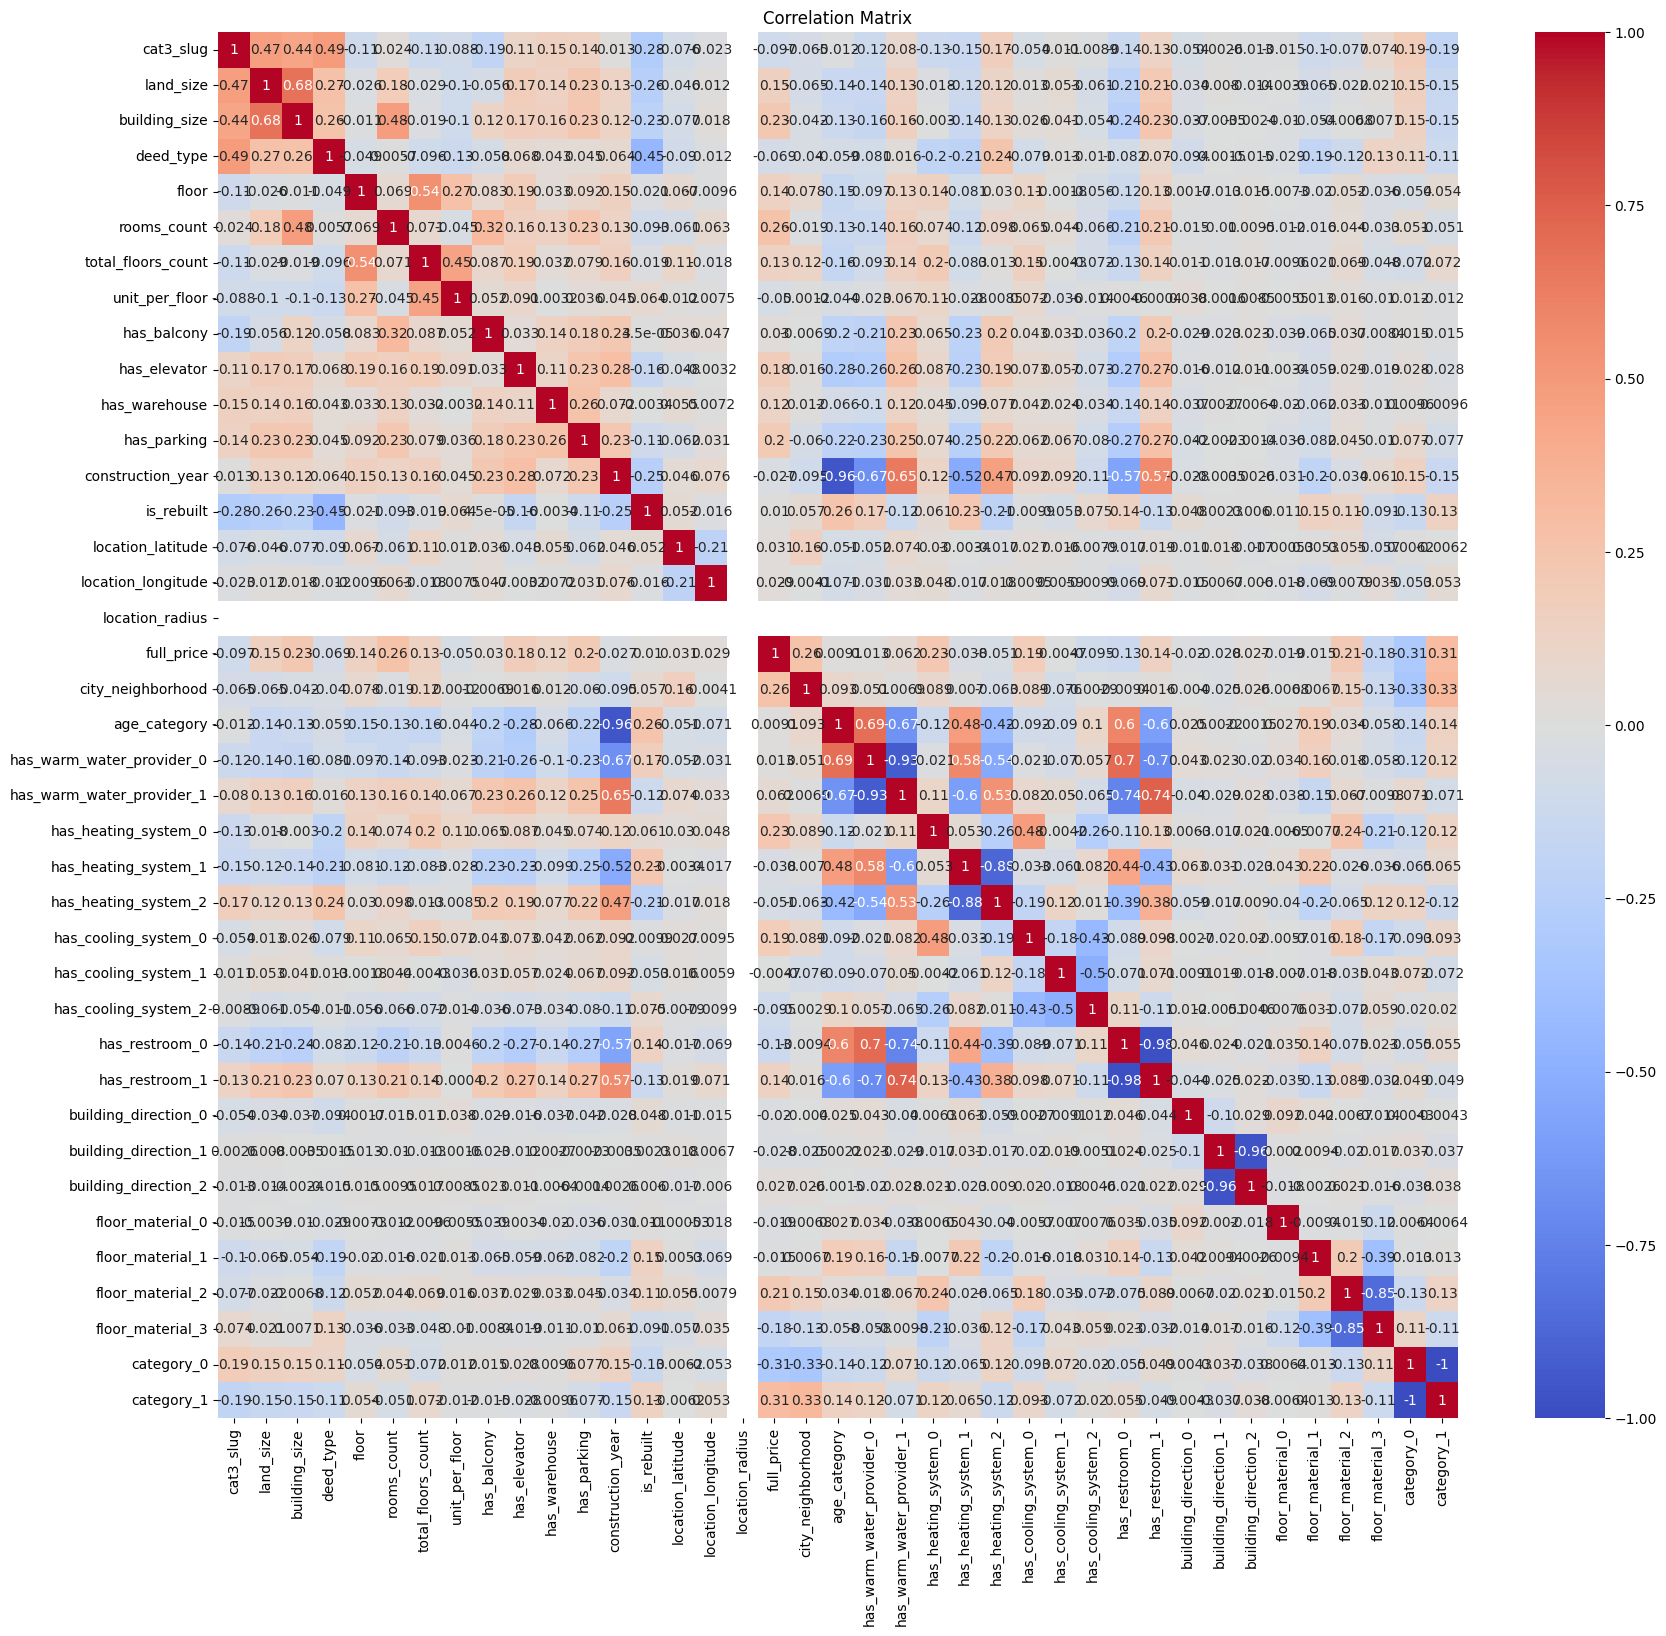

In [641]:
fig_cor , ax_cor = plt.subplots(1, 1, figsize=(20, 18))
sns.heatmap(train_data1.corr(numeric_only=True), annot=True, cmap='coolwarm')
ax_cor.set_title('Correlation Matrix')
plt.show()

In [646]:
train_data2 = train_data1.drop(['location_radius', 'category_1', 'has_restroom_1', 'building_direction_2', 'construction_year'], axis=1)
valid_data2 = valid_data1.drop(['location_radius', 'category_1', 'has_restroom_1', 'building_direction_2', 'construction_year'], axis=1)
test_data2 = test_data1.drop(['location_radius', 'category_1', 'has_restroom_1', 'building_direction_2', 'construction_year'], axis=1)

In [647]:
train_data2

,cat3_slug,land_size,building_size,deed_type,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,...,has_cooling_system_1,has_cooling_system_2,has_restroom_0,building_direction_0,building_direction_1,floor_material_0,floor_material_1,floor_material_2,floor_material_3,category_0
0,0.090909,0.087591,0.108434,1.0,0.161290,0.2,0.071429,0.125,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.727273,1.000000,1.000000,1.0,0.096774,0.2,0.071429,0.125,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.090909,0.166199,0.213855,0.4,0.096774,0.4,0.035714,0.250,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.090909,0.491859,0.478916,0.4,0.032258,0.4,0.071429,0.000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.090909,0.177428,0.177711,1.0,0.129032,0.2,0.071429,0.125,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317436,1.000000,0.123526,0.165663,1.0,0.129032,0.0,0.107143,0.125,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
317437,0.181818,0.222347,0.524096,0.6,0.129032,0.6,0.142857,0.125,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
317438,1.000000,0.446940,0.358434,1.0,0.129032,0.0,0.142857,0.125,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
317439,0.727273,1.000000,1.000000,1.0,0.096774,0.2,0.071429,0.125,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [648]:
train_data2.to_csv('E:/uni\AI quera\project\data_project1/final_train.csv')
valid_data2.to_csv('E:/uni\AI quera\project\data_project1/final_valid.csv')
test_data2.to_csv('E:/uni\AI quera\project\data_project1/final_test.csv')